In [363]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

%matplotlib inline
pd.options.display.float_format = '{:20,.0f}'.format
pd.options.display.max_columns = 99
np.random.seed(42)

In [364]:
parking = pd.read_csv('실전db.csv', encoding='cp949')

In [365]:
parking = parking.rename(columns=str.lower)

In [366]:
parking.describe()

,user_id,store_id,count
count,"879,271","879,271","879,271"
mean,"1,206,566","149,600",1
std,"420,653","68,898",1
min,224,4,1
25%,"900,576","92,437",1
50%,"1,321,440","173,059",1
75%,"1,542,416","220,661",1
max,"1,830,598","231,465",61


In [367]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     879271 non-null  int64 
 1   join_date   879271 non-null  object
 2   d_type      879271 non-null  object
 3   store_id    879271 non-null  int64 
 4   goods_type  879271 non-null  object
 5   date        879271 non-null  object
 6   count       879271 non-null  int64 
 7   ad1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [368]:
parking.head()

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


In [371]:
# Unix time error 어떻게 처리?
parking[(parking['join_date'] < '2014-01-07')]

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD
41867,1081430,1970-01-01,CC,105267,C,2020-01-24,2,YO
80732,1081430,1970-01-01,CC,90070,A,2020-02-15,1,GD
95915,1081430,1970-01-01,CC,182320,A,2020-02-23,1,JRR
130040,1081430,1970-01-01,CC,90070,D,2020-03-12,1,GD
159509,1081430,1970-01-01,CC,203763,C,2020-03-26,1,MP
192785,1081430,1970-01-01,CC,90070,A,2020-04-11,1,GD
209170,1081430,1970-01-01,CC,106129,A,2020-04-19,1,J
225122,1081430,1970-01-01,CC,182320,A,2020-04-26,1,JRR
254373,1081430,1970-01-01,CC,90070,A,2020-05-10,1,GD


NA값은 없다.
변수들의 값을 파악하기 위한 EDA 진행

In [335]:
# count
parking['count'].value_counts()

1     863775
2      13519
3       1061
4        271
5        136
6         66
7         45
9         25
16        21
12        21
8         20
13        19
14        19
15        19
28        17
10        16
11        15
17        15
23        15
21        14
18        14
25        14
19        13
22         9
32         9
26         9
27         7
24         7
30         7
31         7
34         7
29         6
20         6
36         5
40         4
37         3
39         3
38         3
46         3
49         3
35         3
42         2
43         2
33         2
50         2
47         2
55         1
53         1
51         1
58         1
41         1
48         1
45         1
44         1
59         1
61         1
Name: count, dtype: int64

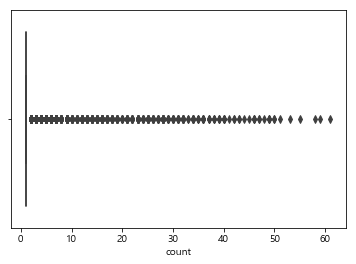

In [336]:
sns.boxplot(x = "count",
            data = parking)
plt.show()

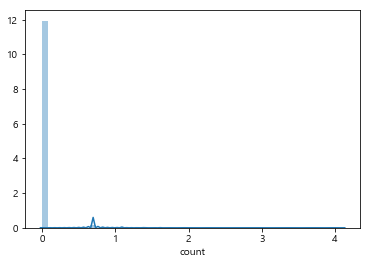

In [337]:
# count 빈도 log
sns.distplot(np.log(parking['count']));

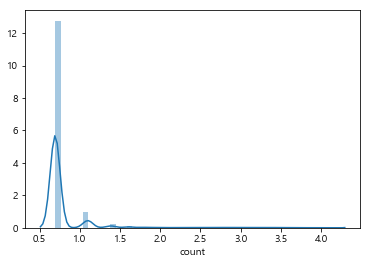

In [338]:
# count != 1 빈도
withoutcount1 = parking.drop(parking[parking['count'] == 1].index)
sns.distplot(np.log(withoutcount1['count']));

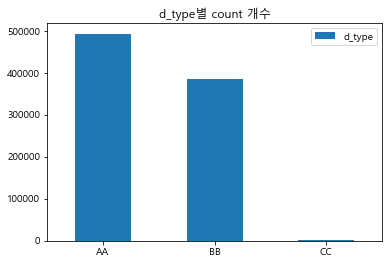

In [339]:
# d_type
countbytypes = pd.DataFrame(parking['d_type'].value_counts())
countbytypes.plot(kind = 'bar', title = 'd_type별 count 개수', rot = 0);

In [340]:
# goods_type
parking['goods_type'].value_counts()

A    609790
C    131163
B    118541
D     19777
Name: goods_type, dtype: int64

In [341]:
# date별 goods_type의 패턴
parking.groupby(['date', 'goods_type']).size().unstack(fill_value=0).loc['2020-01-01':'2020-01-31',:]

goods_type,A,B,C,D
date,,,,
2020-01-01,661,34,210,19
2020-01-02,921,304,197,56
2020-01-03,905,505,268,46
2020-01-04,1553,144,454,37
2020-01-05,1065,56,351,27
2020-01-06,950,276,192,45
2020-01-07,1021,347,225,33
2020-01-08,997,437,195,33
2020-01-09,988,433,255,42


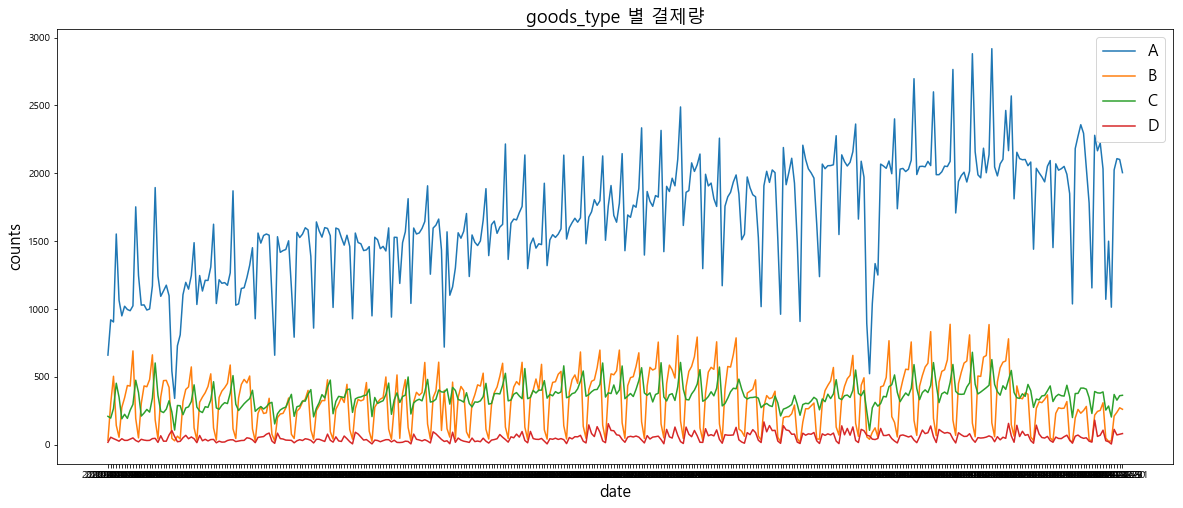

In [342]:
# goods_type 별 결제량 시각화
countbydate = parking.groupby(['date', 'goods_type']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(countbydate.index, countbydate['A'])
sns.lineplot(countbydate.index, countbydate['B'])
sns.lineplot(countbydate.index, countbydate['C'])
sns.lineplot(countbydate.index, countbydate['D'])

plt.legend(['A', 'B', 'C', 'D'], loc='best', fontsize=16)
plt.title('goods_type 별 결제량', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = None)
plt.show()


In [343]:
parking.groupby(['store_id', 'ad1']).size().unstack(fill_value=0).head(20)

ad1,0,ABP,ADS,AOI,BF,BHW,BI,BJG,BO,BOI,BP,BUD,CAS,CCA,CD,CN,COI,CU,CVB,CY,DB,DIV,DJ,DM,DOI,DSO,DY,EP,GAS,GAY,GB,GBC,GD,GEJ,GGC,GGM,GGY,GHN,GJ,GKP,GN,GPJ,GR,GS,GSN,GSW,GW,GYI,IND,IYS,J,JR,JRR,MP,NO,NW,P,PJP,Q,QGI,QH,R,RRR,SB,SC,SD,SDU,SG,SJV,SOD,SOI,SP,VO,VU,WAE,WF,WH,WOID,WT,X,YC,YD,YO,ZE,ZP
store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [344]:
parking['store_id'].value_counts()

220557    17617
220893    17220
220655    16275
220848    15935
92437     15866
          ...  
230996        1
230216        1
223665        1
223066        1
225629        1
Name: store_id, Length: 1061, dtype: int64

In [345]:
parking['ad1'].unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'DY', 'WH',
       'GR', 'X', 'CVB', 'ADS', 'VO'], dtype=object)

#### 🚙EDA를 통해 파악한 변수와 카테고리 값의 내용은 아래와 같다.

1. count : 결제 건수
<br>개인이 주차로 하루에 61건을 결제하는게 믿기지 않지만 어쨋든 data description에서 count는 결제 건수라고 명시했다. 종속 변수라고 정해주셨는데, 1값이 너무 많다. 1을 빼고 보면 또 2값이 너무 많다. 극단치를 어떻게 정할지 의논이 필요해보인다. 아니면 1을 줄이는 방법도 고려해야겠다.
<br>
2. join_date : 가입일
<br>가입 날짜에서 얼마나 오래된 유저인지 파악할 수 있겠다. 몇 년차로 볼 수도 있겠지만 몇 개월차로 보는 것이 바람직해 보인다.
<br>
3. d_type : 결제 수단
<br>처음엔 값이 3개인게 제휴/공유/사설주차장으로 나눠지는 주차장 정보일 것이라고 생각했다. 하지만 count가 결제 건수인데 사설 주차장은 위치 정보만 제공하고 결제는 할 수 없다. 따라서 주차장 정보는 아닐 것이다. 3개로 나눠지는 정보가 뭐가 있나 **모두의 주차장 앱**을 찾아보니 결제 수단인 것으로 판단된다. 결제 수단은 카드/네이버페이/휴대폰 결제 이렇게 나눌 수 있다.
<br>
4. ad1 : 서울 지역 코드
<br>GN은 강남 J는 중구 같다는 팀 회의 아이디어를 듣고 서울시 행정구역 코드라고 생각했으나 값이 85개라 서울시 행정구역 코드는 아닌 것으로 보인다. 그렇다고 전국 지역 코드라고는 보이지 않는게 함께 주어진 교통량 데이터가 서울지역만 있다. 그래서 서울 지역 코드인듯.
<br>
5. store_id : 지역 코드 세분 번호
<br>강남1, 강남2 이런 식으로 지역 세분화 하는 넘버가 store_id인 것으로 보인다. GN 밑에 여러 store_id가 들어가는데, store_id가 여러 GN에 들어가지 않는다. 1:n 관계
<br>
6. goods_type : 판매권
<br>
판매권은 값이 4개 이상이다. 당일권, 시간제, 심야, 야간, 월별 주차권 등이 있다. goods_type은 이런 것들을 뭉뚱그려 합친 것으로 A, B, C, D가 각각 제휴주간, 제휴야간, 공유주간, 공유야간 주차권의 합으로 보인다. 이유는 날짜별 데이터를 보고 파악했는데, A와 C는 토요일에 증가하는 반면 B와 D는 금요일에 증가하고 일요일에 바닥을 친다. 이렇게 A와 C, B와 D가 비슷한 모습을 보이는데 제휴 주차장과 공유 주차장의 규모 차이가 있는게 이렇게 나타나는 것으로 파악했다.
<br>

|구분|주간|야간|
|---|---|---|
|제휴|A|B|
|공유|C|D|



#### 🔧Feature Engineering 진행

In [346]:
weather_data = pd.read_csv('서울시_기상데이터.csv', encoding='cp949')
weather_data.dtypes

지점        int64
일시       object
기온      float64
강수량     float64
풍속      float64
습도        int64
일조시간    float64
적설량     float64
지면온도    float64
지중온도    float64
dtype: object

In [347]:
weather_data['일시'] = weather_data['일시'].astype('datetime64')
weather_data['date'] = weather_data['일시'].dt.date
weather_data = weather_data.fillna(0)

In [348]:
weather_mean = weather_data.groupby('date').mean()
weather_mean

,지점,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
date,,,,,,,,,
2020-01-01,108,-3,0,1,63,0,0,-1,3
2020-01-02,108,1,0,2,65,0,0,-0,3
2020-01-03,108,0,0,2,58,0,0,-1,3
2020-01-04,108,1,0,2,51,0,0,-0,3
2020-01-05,108,1,0,1,46,0,0,-1,3
...,...,...,...,...,...,...,...,...,...
2020-12-27,108,5,0,2,63,0,0,1,2
2020-12-28,108,7,0,1,71,0,0,3,2
2020-12-29,108,1,0,3,72,0,0,-0,3


In [349]:
weather_mean['weather'] = np.where(weather_mean["강수량"].values >= 0.1 , "rain", np.where(weather_mean['적설량'].values > 0, 'snow', 'none'))
weather_mean['weather'].value_counts()
weather_mean.iloc[40:50,:]

,지점,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,weather
date,,,,,,,,,,
2020-02-10,108,4,0,2,51,0,0,3,3,none
2020-02-11,108,6,0,2,39,0,0,3,3,none
2020-02-12,108,7,0,2,69,0,0,6,4,rain
2020-02-13,108,7,0,2,85,0,0,7,5,none
2020-02-14,108,8,0,1,71,0,0,7,6,none
2020-02-15,108,10,0,3,62,0,0,7,6,none
2020-02-16,108,-1,1,4,83,0,2,2,6,rain
2020-02-17,108,-6,0,3,67,0,3,0,5,snow
2020-02-18,108,-4,0,2,44,0,1,-0,4,snow


In [350]:
weather_mean = weather_mean.rename_axis('date').reset_index()

In [351]:
just_weather = weather_mean[['date', 'weather']]
just_weather

,date,weather
0,2020-01-01,none
1,2020-01-02,none
2,2020-01-03,none
3,2020-01-04,none
4,2020-01-05,none
...,...,...
361,2020-12-27,none
362,2020-12-28,none
363,2020-12-29,none
364,2020-12-30,none


In [352]:
parking = pd.merge(parking, weather_mean[['date', 'weather']], how = 'left', on = 'date').fillna('none')

In [353]:
# feature engineering
# 기본 날짜 데이터 쪼개기
parking['date'] = parking['date'].astype('datetime64')
parking['year'] = parking['date'].dt.year
parking['month'] = parking['date'].dt.month
parking['day'] = parking['date'].dt.day
parking['week'] = parking['date'].dt.isocalendar().week

# 공휴일 추가
parking['isholiday'] = parking['date'].isin(['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25'])

# 몇개월차 유저?
# 0개월차 유저를 없애주기 위해 구매날짜 - 가입날짜 + 1
parking['join_date'] = parking['join_date'].astype('datetime64')
parking['howlonguser'] = (parking['year']*12 + parking['month']) - (parking['join_date'].dt.year*12 + parking['join_date'].dt.month) + 1

In [354]:
parking

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,weather,year,month,day,week,isholiday,howlonguser
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,none,2020,1,1,1,True,73
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,none,2020,1,1,1,True,72
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,none,2020,1,1,1,True,63
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,none,2020,1,1,1,True,62
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,none,2020,1,1,1,True,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,none,2020,12,31,53,False,1
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,none,2020,12,31,53,False,1
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,none,2020,12,31,53,False,1
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,none,2020,12,31,53,False,1


#### Feature Engineering 내용 정리

1. 주어진 서울시 기상데이터 csv 파일로 `weather` 변수를 추가했다. 크게 '비', '눈', '해당없음' 이렇게 3가지 값만 가지고 있다.
2. 날짜는 연, 월, 일, 주차로 쪼개서 저장하여 각각 `year`, `month`, `day`, `week`의 변수를 추가했다. 이 중 연도 데이터가 필요할지는 모르겠지만 우선 진행한다.
3. (결제년월 - 가입년월)로 몇개월차 유저인지 파악하는 변수 `howlonguser`를 만들었다. count와 관계를 보고 오랜 유저일수록 결제 건수가 어떻게 달라지는지 확인할 수 있겠다.
4. 국가 공휴일 데이터인 `isholiday` 변수를 추가했다. 국가 공휴일은 api로 받는 방법도 있는 것 같다. 하지만 key 입력 등 빠른 공유는 힘들어 보이고, 2020년에 한정된 데이터만 집어넣으면 되므로 다음의 사이트를 참고하여 공휴일 컬럼을 만들었다.<br>
https://publicholidays.co.kr/ko/2020-dates/
한편 feature engineering으로 살펴봐야할 요소가 많아졌다. 추가적인 EDA를 진행해보자.

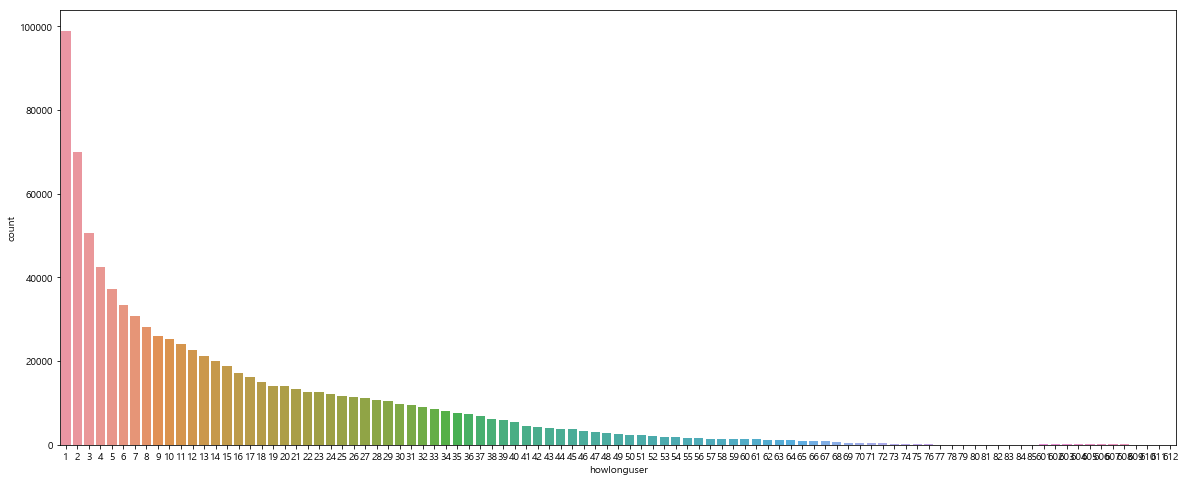

In [355]:
plt.figure(figsize=(20,8))
users = sns.countplot(data = parking, x = 'howlonguser');